# Pokemon with stats

**Этот набор данных содержит:**
 - `#`: ID каждого покемона 
 - `Name`: Имя покемона
 
*Каждый покемон имеет тип. Это его отличительная способность.*

 - `Type 1`: Физический тип. Например: нормальный, боевой, летающий и т.д.
 - `Type 2`: Специальный тип. Например: волшебный, огненный, водяной и т.д. 
 - `Total`: Параметр, показывающий на сколько сильным является покемон
 - `HP`: Здоровье. Параметр, показывающий сколько урона покемон может выдержать
 - `Attack`: Базовый модификатор атаки
 - `Defense`: Сопротивление базовому урону
 - `SP Atk`: Специальная атака, базовый модификатор для специальных атак (например, огонь, пузырь)
 - `SP Def`: Сопротивление базовому урону от специальных атак
 - `Speed`: Определяет какой покемон атакует первым
 - `Generation`: Поколение покемонов
 - `Legendary`: Легендарность
 
*Задача предсказания - определить, является ли покемон легендарным.*

 **Используемые библиотеки:**

- `numpy` – матричные операции
- `matplotlib` – научная графика
- `pandas` – таблицы для анализа данных
- `scikit-learn` – алгоритмы машинного обучения

 
 




## Домашняя работа №1

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

*Cчитывание данных. Получение DateFrame - многомерный массив значений. Каждый столбец DataFrame представляет структуру Series.*

In [2]:
data = pd.read_csv('../MachineLearning/DataSet/Pokemon.csv') 

In [3]:
# Вывод типа данных
print(type(data))
print(type(data['HP']))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [4]:
# Вывод таблицы данныx 
#print(data)
data

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False
9,7,Squirtle,Water,NaN,314,44,48,65,50,64,43,1,False


In [5]:
# Вывод первых 10 строк таблицы 
data.head(10)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False
9,7,Squirtle,Water,NaN,314,44,48,65,50,64,43,1,False


In [6]:
# Вывод последних 10 строк таблицы
data.tail(10)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
790,714,Noibat,Flying,Dragon,245,40,30,35,45,40,55,6,False
791,715,Noivern,Flying,Dragon,535,85,70,80,97,80,123,6,False
792,716,Xerneas,Fairy,NaN,680,126,131,95,131,98,99,6,True
793,717,Yveltal,Dark,Flying,680,126,131,95,131,98,99,6,True
794,718,Zygarde50% Forme,Dragon,Ground,600,108,100,121,81,95,95,6,True
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True
799,721,Volcanion,Fire,Water,600,80,110,120,130,90,70,6,True


In [7]:
# Вывод размера данных. Кортеж (m, n), где  m - кол-во строк, n - кол-во столбцов таблицы данных.
print(data.shape)

# Вывод наименований столбцов таблицы
print(data.columns)

(800, 13)
Index(['#', 'Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')


In [8]:
# Вывод информации о наборе данных 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
#             800 non-null int64
Name          800 non-null object
Type 1        800 non-null object
Type 2        414 non-null object
Total         800 non-null int64
HP            800 non-null int64
Attack        800 non-null int64
Defense       800 non-null int64
Sp. Atk       800 non-null int64
Sp. Def       800 non-null int64
Speed         800 non-null int64
Generation    800 non-null int64
Legendary     800 non-null bool
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


## Описательная статистика

In [9]:
# По количественным признакам 
data.describe()

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,362.813750,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,208.343798,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.000000,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,184.750000,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,364.500000,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,539.250000,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,721.000000,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


In [10]:
# По всем признакам 
data.describe(include = 'all')

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
count,800.000000,800,800,414,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000,800
unique,NaN,800,18,18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,Mr. Mime,Water,Flying,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
freq,NaN,1,112,97,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,735
mean,362.813750,NaN,NaN,NaN,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375,NaN
std,208.343798,NaN,NaN,NaN,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129,NaN
min,1.000000,NaN,NaN,NaN,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000,NaN
25%,184.750000,NaN,NaN,NaN,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000,NaN
50%,364.500000,NaN,NaN,NaN,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000,NaN
75%,539.250000,NaN,NaN,NaN,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000,NaN


In [11]:
# Вывод кореляции между признаками
data.corr()

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,1.000000,0.119813,0.097614,0.102298,0.094786,0.088759,0.085817,0.010733,0.982516,0.153396
Total,0.119813,1.000000,0.618748,0.736211,0.612787,0.747250,0.717609,0.575943,0.048384,0.501758
HP,0.097614,0.618748,1.000000,0.422386,0.239622,0.362380,0.378718,0.175952,0.058683,0.273620
Attack,0.102298,0.736211,0.422386,1.000000,0.438687,0.396362,0.263990,0.381240,0.051451,0.345408
Defense,0.094786,0.612787,0.239622,0.438687,1.000000,0.223549,0.510747,0.015227,0.042419,0.246377
Sp. Atk,0.088759,0.747250,0.362380,0.396362,0.223549,1.000000,0.506121,0.473018,0.036437,0.448907
Sp. Def,0.085817,0.717609,0.378718,0.263990,0.510747,0.506121,1.000000,0.259133,0.028486,0.363937
Speed,0.010733,0.575943,0.175952,0.381240,0.015227,0.473018,0.259133,1.000000,-0.023121,0.326715
Generation,0.982516,0.048384,0.058683,0.051451,0.042419,0.036437,0.028486,-0.023121,1.000000,0.079794
Legendary,0.153396,0.501758,0.273620,0.345408,0.246377,0.448907,0.363937,0.326715,0.079794,1.000000


   *Параметр Total сильно коррелирован с HP и Attack. Что и должно быть. Чем сильнее покемон, тем больше его HP и модификатор атаки.*

In [12]:
# Корреляция для легендарных покемонов 
data[data["Legendary"] == True ].corr()

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,1.000000,-0.115444,-0.021318,0.114391,-0.034680,-0.016494,-0.133367,-0.205028,0.992081,NaN
Total,-0.115444,1.000000,0.451218,0.668782,0.105290,0.610607,0.194525,0.142228,-0.123201,NaN
HP,-0.021318,0.451218,1.000000,0.176166,0.076634,0.029604,0.016942,-0.137105,-0.017262,NaN
Attack,0.114391,0.668782,0.176166,1.000000,-0.210974,0.567287,-0.391433,0.269200,0.093102,NaN
Defense,-0.034680,0.105290,0.076634,-0.210974,1.000000,-0.510352,0.377674,-0.527786,-0.017889,NaN
Sp. Atk,-0.016494,0.610607,0.029604,0.567287,-0.510352,1.000000,-0.154694,0.310406,-0.032872,NaN
Sp. Def,-0.133367,0.194525,0.016942,-0.391433,0.377674,-0.154694,1.000000,-0.493259,-0.113199,NaN
Speed,-0.205028,0.142228,-0.137105,0.269200,-0.527786,0.310406,-0.493259,1.000000,-0.225116,NaN
Generation,0.992081,-0.123201,-0.017262,0.093102,-0.017889,-0.032872,-0.113199,-0.225116,1.000000,NaN
Legendary,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
# Корреляция для не легендарных покемонов 
data[data["Legendary"] == False ].corr()

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,1.000000,0.057128,0.063622,0.048812,0.065885,0.025615,0.046222,-0.032424,0.984649,NaN
Total,0.057128,1.000000,0.586473,0.699817,0.608721,0.685697,0.698582,0.520161,0.015467,NaN
HP,0.063622,0.586473,1.000000,0.377668,0.192426,0.299471,0.337606,0.109847,0.042132,NaN
Attack,0.048812,0.699817,0.377668,1.000000,0.437192,0.261879,0.211872,0.305346,0.020456,NaN
Defense,0.065885,0.608721,0.192426,0.437192,1.000000,0.186030,0.475241,-0.040796,0.026482,NaN
Sp. Atk,0.025615,0.685697,0.299471,0.261879,0.186030,1.000000,0.471164,0.393205,0.003415,NaN
Sp. Def,0.046222,0.698582,0.337606,0.211872,0.475241,0.471164,1.000000,0.212542,0.008990,NaN
Speed,-0.032424,0.520161,0.109847,0.305346,-0.040796,0.393205,0.212542,1.000000,-0.041411,NaN
Generation,0.984649,0.015467,0.042132,0.020456,0.026482,0.003415,0.008990,-0.041411,1.000000,NaN
Legendary,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Вывод графика показывающего принадлежность к классу легендарных покемонов по значению HP и Attack**

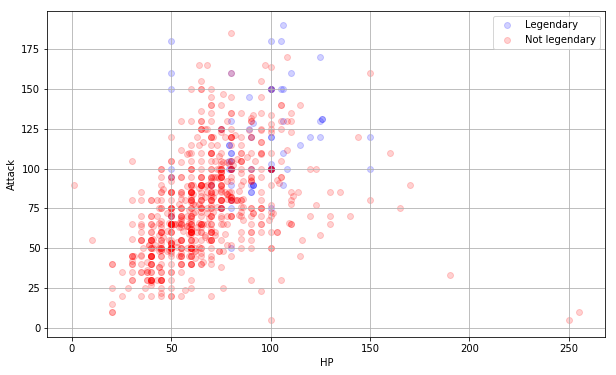

In [14]:
plt.figure(figsize = (10, 6))

plt.scatter(data[data['Legendary'] == True]['HP'],
            data[data['Legendary'] == True]['Attack'],
            alpha = 0.18,
            label = 'Legendary',
            color = 'b')

plt.scatter(data[data['Legendary'] == False]['HP'],
            data[data['Legendary'] == False]['Attack'],
            alpha = 0.18,
            label = 'Not legendary',
            color = 'r')

plt.xlabel('HP')
plt.ylabel('Attack')
plt.legend()
plt.grid()

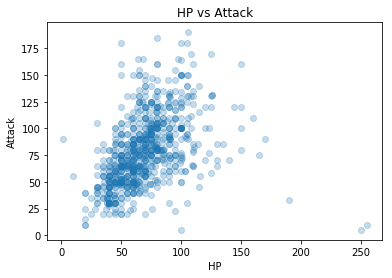

In [15]:
plt.plot(data['HP'], data['Attack'], 'o', alpha = 0.25)
plt.xlabel('HP')
plt.ylabel('Attack')
plt.title('HP vs Attack')
pass

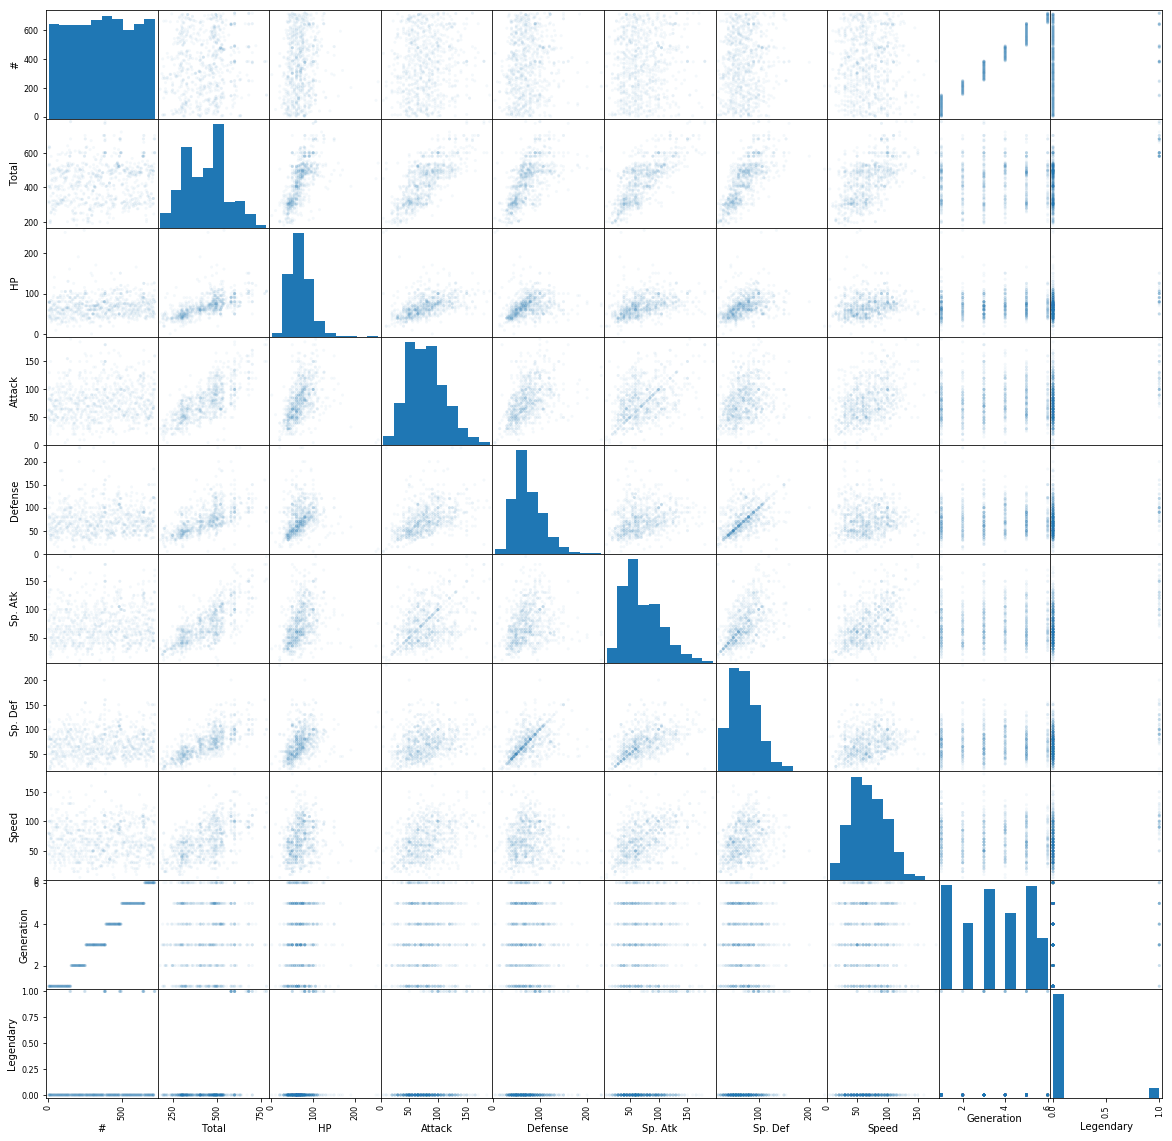

In [16]:
from pandas.plotting import scatter_matrix
scatter_matrix(data, alpha = .05, figsize = (20, 20))
pass

# Подготовка даннных


In [17]:
data['Type 1'].dtype.name

'object'

In [18]:
data['HP'].dtype.name

'int64'

In [19]:
# Заполнить NAN наиболее встречающимся значением.
data = data.fillna(value=data['Type 2'].describe().top)

In [20]:
# Удаление столбцов Name, ID(#), Legendary. 
ready_data = data.drop(('Name'), axis = 1).drop(('#'), axis = 1).drop(('Legendary'), axis = 1)
# Вывод
ready_data

,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
0,Grass,Poison,318,45,49,49,65,65,45,1
1,Grass,Poison,405,60,62,63,80,80,60,1
2,Grass,Poison,525,80,82,83,100,100,80,1
3,Grass,Poison,625,80,100,123,122,120,80,1
4,Fire,Flying,309,39,52,43,60,50,65,1
5,Fire,Flying,405,58,64,58,80,65,80,1
6,Fire,Flying,534,78,84,78,109,85,100,1
7,Fire,Dragon,634,78,130,111,130,85,100,1
8,Fire,Flying,634,78,104,78,159,115,100,1
9,Water,Flying,314,44,48,65,50,64,43,1


In [21]:
# Разделение на категориальные и числовые признаки
categorical_columns = [c for c in ready_data.columns if ready_data[c].dtype.name == 'object']
numerical_columns   = [c for c in ready_data.columns if ready_data[c].dtype.name != 'object']
# Вывод
print(categorical_columns)
print(numerical_columns)

['Type 1', 'Type 2']
['Total', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Generation']


In [22]:
# Вывод уникальных значений из категориальных столбцов
for c in categorical_columns:
    print(c, ready_data[c].unique())

Type 1 ['Grass' 'Fire' 'Water' 'Bug' 'Normal' 'Poison' 'Electric' 'Ground' 'Fairy'
 'Fighting' 'Psychic' 'Rock' 'Ghost' 'Ice' 'Dragon' 'Dark' 'Steel' 'Flying']
Type 2 ['Poison' 'Flying' 'Dragon' 'Ground' 'Fairy' 'Grass' 'Fighting' 'Psychic'
 'Steel' 'Ice' 'Rock' 'Dark' 'Water' 'Electric' 'Fire' 'Ghost' 'Bug'
 'Normal']


# Векторизация


In [23]:
data_describe = ready_data.describe(include = [object])
data_describe
binary_columns    = [c for c in categorical_columns if data_describe[c]['unique'] == 2]
nonbinary_columns = [c for c in categorical_columns if data_describe[c]['unique'] > 2]
print(binary_columns, nonbinary_columns)

[] ['Type 1', 'Type 2']


In [24]:
# Векторизация категориальныx признаков
data_nonbinary = pd.get_dummies(ready_data[nonbinary_columns])
print(data_nonbinary.columns)

Index(['Type 1_Bug', 'Type 1_Dark', 'Type 1_Dragon', 'Type 1_Electric',
       'Type 1_Fairy', 'Type 1_Fighting', 'Type 1_Fire', 'Type 1_Flying',
       'Type 1_Ghost', 'Type 1_Grass', 'Type 1_Ground', 'Type 1_Ice',
       'Type 1_Normal', 'Type 1_Poison', 'Type 1_Psychic', 'Type 1_Rock',
       'Type 1_Steel', 'Type 1_Water', 'Type 2_Bug', 'Type 2_Dark',
       'Type 2_Dragon', 'Type 2_Electric', 'Type 2_Fairy', 'Type 2_Fighting',
       'Type 2_Fire', 'Type 2_Flying', 'Type 2_Ghost', 'Type 2_Grass',
       'Type 2_Ground', 'Type 2_Ice', 'Type 2_Normal', 'Type 2_Poison',
       'Type 2_Psychic', 'Type 2_Rock', 'Type 2_Steel', 'Type 2_Water'],
      dtype='object')


# Нормализация количественных признаков


In [25]:
data_numerical = ready_data[numerical_columns]
data_numerical.describe()

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


In [26]:
data_numerical = (data_numerical - data_numerical.mean(axis = 0))/data_numerical.std(axis = 0)
data_numerical.describe()

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,8.000000e+02,8.000000e+02,8.000000e+02,8.000000e+02,8.000000e+02,8.000000e+02,8.000000e+02,8.000000e+02
mean,-1.160183e-16,-5.410949e-16,2.553513e-17,5.828671e-18,2.295386e-16,-2.584044e-16,-1.208669e-16,2.837175e-15
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.126509e+00,-2.673179e+00,-2.279952e+00,-2.207658e+00,-1.919792e+00,-1.865056e+00,-2.177442e+00,-1.398762e+00
25%,-8.761240e-01,-7.542197e-01,-7.394701e-01,-7.645870e-01,-7.050239e-01,-7.870411e-01,-8.010021e-01,-7.968204e-01
50%,1.241841e-01,-1.667831e-01,-1.232771e-01,-1.232222e-01,-2.389808e-01,-6.836414e-02,-1.127821e-01,-1.948786e-01
75%,6.660176e-01,4.206536e-01,6.469641e-01,5.181426e-01,6.778253e-01,6.503128e-01,7.474930e-01,1.009005e+00
max,2.875031e+00,7.274081e+00,3.419832e+00,5.007696e+00,3.703286e+00,5.681051e+00,3.844483e+00,1.610947e+00


# Объединение данных в одну таблицу

In [27]:
ready_data = pd.concat((data_numerical, data_nonbinary, ready_data[binary_columns]), axis = 1)
print(ready_data.shape)

(800, 44)


In [28]:
ready_data.describe()

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Type 1_Bug,Type 1_Dark,...,Type 2_Ghost,Type 2_Grass,Type 2_Ground,Type 2_Ice,Type 2_Normal,Type 2_Poison,Type 2_Psychic,Type 2_Rock,Type 2_Steel,Type 2_Water
count,8.000000e+02,8.000000e+02,8.000000e+02,8.000000e+02,8.000000e+02,8.000000e+02,8.000000e+02,8.000000e+02,800.000000,800.000000,...,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,-1.160183e-16,-5.410949e-16,2.553513e-17,5.828671e-18,2.295386e-16,-2.584044e-16,-1.208669e-16,2.837175e-15,0.086250,0.038750,...,0.017500,0.031250,0.043750,0.017500,0.005000,0.042500,0.041250,0.017500,0.027500,0.017500
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.280908,0.193119,...,0.131207,0.174101,0.204666,0.131207,0.070578,0.201853,0.198992,0.131207,0.163637,0.131207
min,-2.126509e+00,-2.673179e+00,-2.279952e+00,-2.207658e+00,-1.919792e+00,-1.865056e+00,-2.177442e+00,-1.398762e+00,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-8.761240e-01,-7.542197e-01,-7.394701e-01,-7.645870e-01,-7.050239e-01,-7.870411e-01,-8.010021e-01,-7.968204e-01,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.241841e-01,-1.667831e-01,-1.232771e-01,-1.232222e-01,-2.389808e-01,-6.836414e-02,-1.127821e-01,-1.948786e-01,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6.660176e-01,4.206536e-01,6.469641e-01,5.181426e-01,6.778253e-01,6.503128e-01,7.474930e-01,1.009005e+00,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2.875031e+00,7.274081e+00,3.419832e+00,5.007696e+00,3.703286e+00,5.681051e+00,3.844483e+00,1.610947e+00,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# X и y

In [29]:
# X - samples
# y - responses
X = ready_data
y = data['Legendary']
feature_names = X.columns

In [30]:
feature_names

Index(['Total', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed',
       'Generation', 'Type 1_Bug', 'Type 1_Dark', 'Type 1_Dragon',
       'Type 1_Electric', 'Type 1_Fairy', 'Type 1_Fighting', 'Type 1_Fire',
       'Type 1_Flying', 'Type 1_Ghost', 'Type 1_Grass', 'Type 1_Ground',
       'Type 1_Ice', 'Type 1_Normal', 'Type 1_Poison', 'Type 1_Psychic',
       'Type 1_Rock', 'Type 1_Steel', 'Type 1_Water', 'Type 2_Bug',
       'Type 2_Dark', 'Type 2_Dragon', 'Type 2_Electric', 'Type 2_Fairy',
       'Type 2_Fighting', 'Type 2_Fire', 'Type 2_Flying', 'Type 2_Ghost',
       'Type 2_Grass', 'Type 2_Ground', 'Type 2_Ice', 'Type 2_Normal',
       'Type 2_Poison', 'Type 2_Psychic', 'Type 2_Rock', 'Type 2_Steel',
       'Type 2_Water'],
      dtype='object')

In [31]:
# d - число входных признаков
# N - длина обучающей выборки
print(X.shape)
print(y.shape)
N, d = X.shape

(800, 44)
(800,)


In [32]:
# Разделение на обучающую и тестовую выборку
from sklearn.model_selection import train_test_split
#from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

N_train, _ = X_train.shape
N_test,  _ = X_test.shape

print(N_train, '+', N_test, '=', N_train + N_test)

560 + 240 = 800


# $k$NN

In [33]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

In [34]:
# Классификация и вычисление ошибки
y_train_predict = knn.predict(X_train)
y_test_predict = knn.predict(X_test)

err_train = np.mean(y_train != y_train_predict)
err_test  = np.mean(y_test  != y_test_predict)

print(err_train, err_test)

0.0339285714286 0.0458333333333


In [35]:
# Другой способ вычисления ошибки
err_test = 1 - knn.score(X_test, y_test) 
err_test

0.045833333333333282

In [36]:
# Визуализация прогноза классификатора.
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, y_test_predict))

[[221   4]
 [  7   8]]


**Подбор параметра k, при котором значение ошибки минимально.**

In [37]:
from sklearn.model_selection import GridSearchCV
#from sklearn.grid_search import GridSearchCV
nnb = [1, 3, 5, 10, 15, 20, 25, 35, 45, 55]
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid = {'n_neighbors': nnb}, cv=10)
grid.fit(X_train, y_train)

best_cv_err = 1 - grid.best_score_
best_n_neighbors = grid.best_estimator_.n_neighbors
print(best_cv_err, best_n_neighbors)

0.0482142857143 5


In [38]:
# Классификация при K = 5
knn = KNeighborsClassifier(n_neighbors = best_n_neighbors).fit(X_train, y_train)

err_train = np.mean(y_train != knn.predict(X_train))
err_test  = np.mean(y_test  != knn.predict(X_test))

print(err_train, err_test)

0.0285714285714 0.0416666666667


**При имеющихся параметрах ошибка предсказания легендарности покемона состовляет 0.04**

## Домашняя работа №4

### Обучаем классификатор

In [39]:
from sklearn.neural_network import MLPClassifier


Обучаем на 1 и 2 слоях по 1000 нейронов на каждом

In [40]:
mlp_model1 = MLPClassifier(hidden_layer_sizes = (1000,), solver = 'lbfgs', 
                          activation = 'logistic', random_state = 42)
mlp_model1.fit(X_train, y_train)

MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(1000,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=42, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [41]:
mlp_model2 = MLPClassifier(hidden_layer_sizes = (1000, 1000), solver = 'lbfgs', 
                          activation = 'logistic', random_state = 42)
mlp_model2.fit(X_train, y_train)

MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(1000, 1000), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=42, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

*Ошибки на обучающей и тестовой выборках*

In [42]:
y_train_pred1 = mlp_model1.predict(X_train)
y_test_pred1 = mlp_model1.predict(X_test)

print("Для модели с 1-им скрытым слоем: ",np.mean(y_train != y_train_pred1), np.mean(y_test != y_test_pred1))

Для модели с 1-им скрытым слоем:  0.0 0.0625


In [43]:
y_train_pred2 = mlp_model2.predict(X_train)
y_test_pred2 = mlp_model2.predict(X_test)

print("Для модели с 2-мя скрытымы слоеми: ",np.mean(y_train != y_train_pred2), np.mean(y_test != y_test_pred2))

Для модели с 2-мя скрытымы слоеми:  0.00357142857143 0.0458333333333


### Подбор гиперпараметров

###### Подберем оптимальное значение параметра регуляризации alpha
Кол-во нейронов для каждого слоя - 100. Дабы уменьшить вычисления.

In [44]:
alpha_arr = np.logspace(-3, 2, 21)

# Для модели с 1-им скрытым слоем
test_err1 = []
train_err1 = []
for alpha in alpha_arr:
    mlp_model = MLPClassifier(alpha = alpha, hidden_layer_sizes = (100,), 
                              solver = 'lbfgs', activation = 'logistic', random_state = 42)
    mlp_model.fit(X_train, y_train)

    y_train_pred = mlp_model.predict(X_train)
    y_test_pred = mlp_model.predict(X_test)
    train_err1.append(np.mean(y_train != y_train_pred))
    test_err1.append(np.mean(y_test != y_test_pred))
    
# Для модели с 2-мя скрытыми слоями
test_err2 = []
train_err2 = []
for alpha in alpha_arr:
    mlp_model = MLPClassifier(alpha = alpha, hidden_layer_sizes = (100, 100), 
                              solver = 'lbfgs', activation = 'logistic', random_state = 42)
    mlp_model.fit(X_train, y_train)

    y_train_pred = mlp_model.predict(X_train)
    y_test_pred = mlp_model.predict(X_test)
    train_err2.append(np.mean(y_train != y_train_pred))
    test_err2.append(np.mean(y_test != y_test_pred))

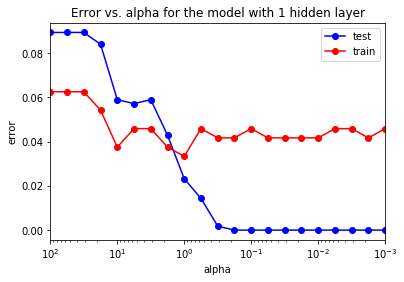

In [45]:
plt.semilogx(alpha_arr, train_err1, 'b-o', label = 'test')
plt.semilogx(alpha_arr, test_err1, 'r-o', label = 'train')
plt.xlim([np.max(alpha_arr), np.min(alpha_arr)])
plt.title('Error vs. alpha for the model with 1 hidden layer')
plt.xlabel('alpha')
plt.ylabel('error')
plt.legend()
pass

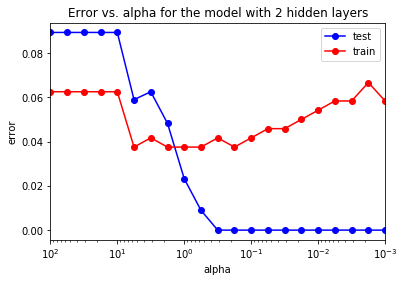

In [46]:
plt.semilogx(alpha_arr, train_err2, 'b-o', label = 'test')
plt.semilogx(alpha_arr, test_err2, 'r-o', label = 'train')
plt.xlim([np.max(alpha_arr), np.min(alpha_arr)])
plt.title('Error vs. alpha for the model with 2 hidden layers')
plt.xlabel('alpha')
plt.ylabel('error')
plt.legend()
pass

Минимальное значение ошибок:

In [47]:
min_train_err1 = np.min(train_err1)
min_test_err1 = np.min(test_err1)
print("1 слой: ", min_train_err1, min_test_err1)

min_train_err2 = np.min(train_err2)
min_test_err2 = np.min(test_err2)
print("2 слой: ", min_train_err2, min_test_err2)

1 слой:  0.0 0.0333333333333
2 слой:  0.0 0.0375


Оптимальное значение alpha:

In [48]:
alpha_opt1 = alpha_arr[test_err1 == min_test_err1]
alpha_opt1 = alpha_opt1[0]
print("Оптимальное значение для модели с 1-им слоем: ", alpha_opt1)

Оптимальное значение для модели с 1-им слоем:  1.0


In [49]:
alpha_opt2 = alpha_arr[test_err2 == min_test_err2]
alpha_opt2 = alpha_opt2[0]
print("Оптимальное значение для модели с 1-им слоем: ", alpha_opt2)

Оптимальное значение для модели с 1-им слоем:  0.177827941004


### Классификатор при найденном оптимальном значении alpha:


In [50]:
alpha_opt = alpha_opt2
mlp_model1 = MLPClassifier(alpha = alpha_opt, hidden_layer_sizes = (100,),
                          solver = 'lbfgs', activation = 'logistic', random_state = 42)
mlp_model1.fit(X_train, y_train)

y_train_pred1 = mlp_model1.predict(X_train)
y_test_pred1 = mlp_model1.predict(X_test)
print("Для модели с 1-им слоем: ", np.mean(y_train != y_train_pred1), np.mean(y_test != y_test_pred1))


mlp_model2 = MLPClassifier(alpha = alpha_opt, hidden_layer_sizes = (100, 100),
                          solver = 'lbfgs', activation = 'logistic', random_state = 42)
mlp_model2.fit(X_train, y_train)

y_train_pred2 = mlp_model2.predict(X_train)
y_test_pred2 = mlp_model2.predict(X_test)
print("Для модели с 2-мя слоями: ", np.mean(y_train != y_train_pred2), np.mean(y_test != y_test_pred2))

Для модели с 1-им слоем:  0.0 0.0416666666667
Для модели с 2-мя слоями:  0.0 0.0375


### Матрица рассогласования:

In [51]:
from sklearn.metrics import confusion_matrix
print("Матрица рассогласования для модели с 1-им слоем")
print(confusion_matrix(y_test_pred1, y_test))

print("Матрица рассогласования для модели с 2-мя слоями")
print(confusion_matrix(y_test_pred2, y_test))

Матрица рассогласования для модели с 1-им слоем
[[217   2]
 [  8  13]]
Матрица рассогласования для модели с 2-мя слоями
[[218   2]
 [  7  13]]


Для модели с 1-им слоем: 


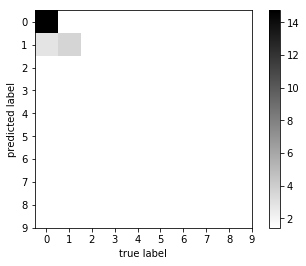

In [52]:
M = confusion_matrix(y_test_pred1, y_test)
M = np.sqrt(M)
plt.imshow(M, interpolation = 'nearest')
plt.set_cmap('binary')
plt.xticks(range(10))
plt.yticks(range(10))
plt.xlabel("true label")
plt.ylabel("predicted label")
plt.colorbar()
print("Для модели с 1-им слоем: ")
pass

Для модели с 2-мя слоями: 


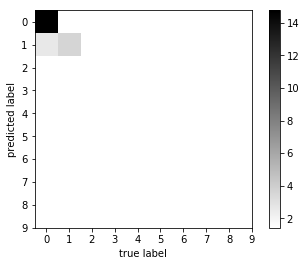

In [53]:

M = confusion_matrix(y_test_pred2, y_test)
M = np.sqrt(M)
plt.imshow(M, interpolation = 'nearest')
plt.set_cmap('binary')
plt.xticks(range(10))
plt.yticks(range(10))
plt.xlabel("true label")
plt.ylabel("predicted label")
plt.colorbar()
print("Для модели с 2-мя слоями: ")
pass

#### Другие метрика качества:

In [54]:
from sklearn.metrics import classification_report
print("Для модели с 1-им слоем: ")
print(classification_report(y_test, y_test_pred1))

Для модели с 1-им слоем: 
             precision    recall  f1-score   support

      False       0.99      0.96      0.98       225
       True       0.62      0.87      0.72        15

avg / total       0.97      0.96      0.96       240



In [55]:
print("Для модели с 2-мя слоями: ")
print(classification_report(y_test, y_test_pred2))

Для модели с 2-мя слоями: 
             precision    recall  f1-score   support

      False       0.99      0.97      0.98       225
       True       0.65      0.87      0.74        15

avg / total       0.97      0.96      0.96       240



# Домашняя работа №5

# Random forest

Проведем обучение Random forest классификатора на тренировочной выборке с параметром n_estimators= 100 (кол-во построенных деревьев).

In [56]:
from sklearn import ensemble
from sklearn.ensemble import RandomForestClassifier
rf = ensemble.RandomForestClassifier(n_estimators = 100)
rf.fit(X_train, y_train)

err_train = np.mean(y_train != rf.predict(X_train))
err_test  = np.mean(y_test  != rf.predict(X_test))

print("error train =",err_train,"error test =",err_test)

error train = 0.0 error test = 0.0333333333333


*График зависимости ошибки (на обучающей и тестовой выборке, oob) от количества используемых деревьев.*

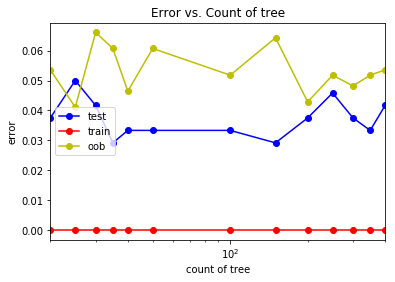

In [57]:
#tree_arr = (1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 25, 30, 35, 40, 50, 100, 200, 300, 400)
tree_arr = (20, 25, 30, 35, 40, 50, 100, 150, 200, 250, 300, 350, 400)
test_err = []
train_err = []
oob_err = []
for tree in tree_arr:
    rf = ensemble.RandomForestClassifier(tree, oob_score = True)
    rf.fit(X_train, y_train)

    y_train_pred = rf.predict(X_train)
    y_test_pred = rf.predict(X_test)
    oob_err.append(1 - rf.oob_score_) 
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))
    
plt.semilogx(tree_arr, test_err, 'b-o', label = 'test')
plt.semilogx(tree_arr, train_err, 'r-o', label = 'train')
plt.semilogx(tree_arr, oob_err, 'y-o', label = 'oob')
plt.xlim([np.min(tree_arr), np.max(tree_arr)])
plt.title('Error vs. Count of tree')
plt.xlabel('count of tree')
plt.ylabel('error')
plt.legend()
pass

*Следует использовать 50 или более деревьев. При меньшем количестве наблюдается переобучение. oob ошибка уменьшается с ростом количества используемых деревьев.*



In [58]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)

print("Min error: train =",min_train_err,"test =",min_test_err)

Min error: train = 0.0 test = 0.0291666666667


# Extremely Randomized Trees

*Обучение Extremely Randomized Trees классификатора на тренировочной выборке с параметром n_estimators = 100 (кол-во построенных деревьев).*

In [59]:
ert = ensemble.ExtraTreesClassifier(n_estimators = 100)
ert.fit(X_train, y_train)

err_train = np.mean(y_train != ert.predict(X_train))
err_test  = np.mean(y_test  != ert.predict(X_test))

print("error train =",err_train,"error test =",err_test)

error train = 0.0 error test = 0.0333333333333


Построим график зависимости ошибки (на обучающей и тестовой выборке, oob) от количества используемых деревьев.

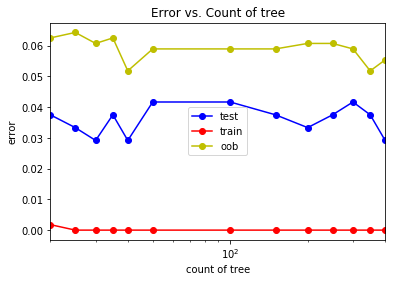

In [60]:
tree_arr = (20, 25, 30, 35, 40, 50, 100, 150, 200, 250, 300, 350, 400)
test_err = []
train_err = []
oob_err = []
for tree in tree_arr:
    ert = ensemble.ExtraTreesClassifier(tree, bootstrap = True, oob_score = True)
    ert.fit(X_train, y_train)

    y_train_pred = ert.predict(X_train)
    y_test_pred = ert.predict(X_test)
    oob_err.append(1 - ert.oob_score_)
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))
    
plt.semilogx(tree_arr, test_err, 'b-o', label = 'test')
plt.semilogx(tree_arr, train_err, 'r-o', label = 'train')
plt.semilogx(tree_arr, oob_err, 'y-o', label = 'oob')
plt.xlim([np.min(tree_arr), np.max(tree_arr)])
plt.title('Error vs. Count of tree')
plt.xlabel('count of tree')
plt.ylabel('error')
plt.legend()
pass

*Оптимальное число деревьев (из выше рассмотренного массива количеств деревьев), которое следует использовать: 35,300 (ошибка на тестовой выборке минимальна). 
В остальных случаях, наблюдается переобучение (местами небольшое). oob ошибка уменьшается с ростом количества используемых деревьев.
Минимальное значение ошибки:*

In [61]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)

print("Min error: train =",min_train_err,"test =",min_test_err)

Min error: train = 0.0 test = 0.0291666666667


# AdaBoost

*Проведем обучение AdaBoost классификатора на тренировочной выборке с параметром n_estimators = 100 (кол-во классификаторов).*

In [62]:
ab = ensemble.AdaBoostClassifier(n_estimators = 100)
ab.fit(X_train, y_train)

err_train = np.mean(y_train != ab.predict(X_train))
err_test = np.mean(y_test != ab.predict(X_test))

print("error train =",err_train,"error test =",err_test)

error train = 0.0 error test = 0.0375


*Ошибка на обучающей выборке: 0.0, на тестовой: ~0.038.
График зависимости ошибки (на обучающей и тестовой выборке, oob) от количества используемых деревьев.*

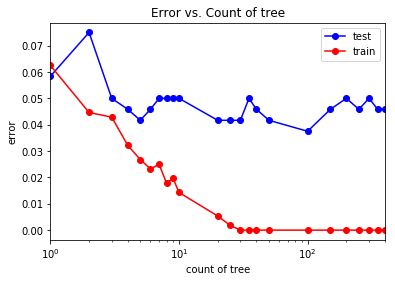

In [63]:
tree_arr = (1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 25, 30, 35, 40, 50, 100, 150, 200, 250, 300, 350, 400)
test_err = []
train_err = []
for tree in tree_arr:
    ab = ensemble.AdaBoostClassifier(n_estimators = tree)
    ab.fit(X_train, y_train)

    y_train_pred = ab.predict(X_train)
    y_test_pred = ab.predict(X_test)
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))
    
plt.semilogx(tree_arr, test_err, 'b-o', label = 'test')
plt.semilogx(tree_arr, train_err, 'r-o', label = 'train')
plt.xlim([np.min(tree_arr), np.max(tree_arr)])
plt.title('Error vs. Count of tree')
plt.xlabel('count of tree')
plt.ylabel('error')
plt.legend()
pass

*Местами наблюдается переобучение. Следует использовать 5 или 100 деревьев (ошибка на тестовой выборке здесь минимальна, исходя из графика).
Минимальное значение ошибки:*

In [64]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)

print("Min error: train =",min_train_err,"test =",min_test_err)

Min error: train = 0.0 test = 0.0375


# Gradient boosted trees

*Проведем обучение Gradient boosted trees классификатора на тренировочной выборке с параметром n_estimators = 100 (кол-во построенных деревьев).*

In [65]:
gbt = ensemble.GradientBoostingClassifier(n_estimators = 100)
gbt.fit(X_train, y_train)

err_train = np.mean(y_train != gbt.predict(X_train))
err_test = np.mean(y_test != gbt.predict(X_test))

print("error train =",err_train,"error test =",err_test)

error train = 0.0 error test = 0.0291666666667


Ошибка на обучающей выборке: 0, на тестовой: ~0.03.
Построим график зависимости ошибки (на обучающей и тестовой выборке, oob) от количества используемых деревьев.

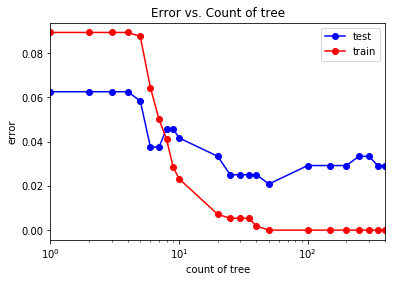

In [66]:
tree_arr = (1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 25, 30, 35, 40, 50, 100, 150, 200, 250, 300, 350, 400)
test_err = []
train_err = []
for tree in tree_arr:
    gbt = ensemble.GradientBoostingClassifier(n_estimators = tree)
    gbt.fit(X_train, y_train)

    y_train_pred = gbt.predict(X_train)
    y_test_pred = gbt.predict(X_test)
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))
    
plt.semilogx(tree_arr, test_err, 'b-o', label = 'test')
plt.semilogx(tree_arr, train_err, 'r-o', label = 'train')
plt.xlim([np.min(tree_arr), np.max(tree_arr)])
plt.title('Error vs. Count of tree')
plt.xlabel('count of tree')
plt.ylabel('error')
plt.legend()
pass

*Наблюдается небольшое переобучение. Следует использовать от 20 до 50 деревьев (ошибка на тестовой выборке здесь минимальна, исходя из графика).
Минимальное значение ошибки:*

In [67]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)

print("Min error: train =",min_train_err,"test =",min_test_err)

Min error: train = 0.0 test = 0.0208333333333


# Домашняя работа №7

## Principal Components Analysis

*С помощью метода главных компонент уменьшем размерность исходных данных и осуществим классификацию.*

*Данные до использования PCA:*

In [68]:
X.shape

(800, 44)

*Исходные данные имеют 44 столбца*

In [69]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 20)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=20, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

*Уменьшим размерность данных до 20*

In [70]:
pca_x = pca.transform(X)

*Данные после использования PCA:*

In [71]:
pca_x.shape

(800, 20)

*Разбиваем данные после применения PCA на обучающую и тестовую выборки. Тестовая выборка содержит 33% данных*

In [72]:
X_train, X_test, y_train, y_test = train_test_split(pca_x, y, test_size = 0.33, random_state = 5)

*Ошибку, полученную после уменьшения размерности данных сравним с ошибкой, которая была получена до применения PCA на примере классификатора Gradient boosted trees
Решим задачу классификации при помощи Gradient boosted trees на данных, полученных после использования PCA и посмотрим уменьшилась ли ошибка.*

In [73]:
from sklearn import ensemble
rf = ensemble.GradientBoostingClassifier(n_estimators = 100)
rf.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

*Проверим качество классификатора по величине ошибки на тестовой и обучающей выборках*

In [75]:
err_train = np.mean(y_train != rf.predict(X_train))
err_test  = np.mean(y_test  != rf.predict(X_test))

print("error train =", err_train)
print("error test =", err_test)

error train = 0.0
error test = 0.030303030303


*После использования PCA ошибки на обучающей выборке совпадают, на тестовой выборке до использования метода главных компонент ошибка составляла - 0.0208333333333, после применения PCA - 0.030303030303, т.е. ошибка на тестовой выборке увеличилась. Ситуация переобучения так же наблюдается.*

*Построим график зависимости ошибки на тестовой и обучающей выборках от количества компонент PCA.*

In [76]:
components_arr = np.arange(1, 30, 1)
test_err = []
train_err = []
for number in components_arr:
    pca = PCA(n_components = number)
    pca.fit(X)
    pca_x = pca.transform(X)
    pca_x_train, pca_x_test, y_train, y_test = train_test_split(pca_x, y, test_size = 0.33, random_state = 5)
    rf = ensemble.GradientBoostingClassifier(n_estimators = 100)
    rf.fit(X_train, y_train)
    y_train_pred = rf.predict(X_train)
    y_test_pred = rf.predict(X_test)
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))

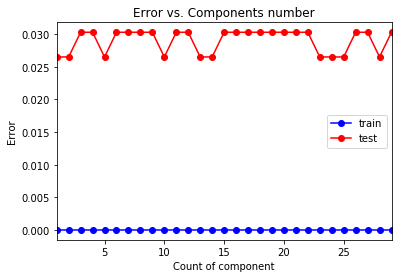

In [77]:
plt.plot(components_arr, train_err, 'b-o', label = 'train')
plt.plot(components_arr, test_err, 'r-o', label = 'test')
plt.xlim([np.min(components_arr), np.max(components_arr)])
plt.title('Error vs. Components number')
plt.xlabel('Count of component')
plt.ylabel('Error')
plt.legend()
pass

*Можно заметить, что ошибка на обучающей выборки практически не меняется при кол-ве компонент от 1 до 30:*

*Ошибка на тестовой выборке минимальна при кол-ве компонент 1, 2, 5, 10, 13, 14, 23, 24, 25, 28.*

*Минимальные значения ошибок на обучающей и тестовой выборке равны:*

In [78]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)

print("Min error: train =",min_train_err,"test =",min_test_err)

Min error: train = 0.0 test = 0.0265151515152


##### Оптимальное количество компонент равно:

In [79]:
opt_components_num = components_arr[test_err == min_test_err]
print(opt_components_num)

[ 1  2  5 10 13 14 23 24 25 28]
